In [1]:
%matplotlib inline
from __future__ import print_function, division
import matplotlib.pyplot as plt
import os
import json
from shapely.geometry import Polygon, box
import shapely.wkt as wkt
from functools import partial
import pyproj
from shapely.ops import transform
import descartes
import numpy as np
import pandas as pd
import geopandas as gp

In [2]:
import config		# local configuration

In [3]:
outdir = '../products/01_tmp/'

In [4]:
project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'), # source coordinate system
    pyproj.Proj(init='epsg:3338')) # AK Albers


In [5]:
studyarea = box(
    config.minlon, config.minlat,
    config.maxlon, config.maxlat)
print(studyarea)
studyarea_AAlb = transform(project, studyarea)
print(studyarea_AAlb)

POLYGON ((-140.5 66.90000000000001, -140.5 67.7, -142 67.7, -142 66.90000000000001, -140.5 66.90000000000001))
POLYGON ((589807.7959673792 1942643.603857861, 571896.4898444491 2029538.338198631, 509089.5794751021 2017329.918583734, 525033.8271910698 1930052.827042172, 589807.7959673792 1942643.603857861))


In [6]:
np.array(studyarea.boundary).T

array([[-140.5, -140.5, -142. , -142. , -140.5],
       [  66.9,   67.7,   67.7,   66.9,   66.9]])

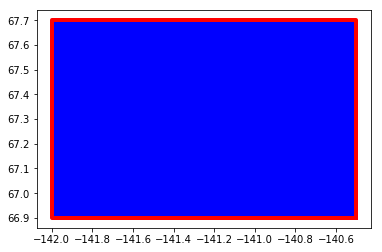

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(*(np.array(studyarea.boundary).T), color='red', linewidth=4)
ax.add_patch(descartes.PolygonPatch(studyarea, fc='blue'))
plt.show()

In [8]:
catalogpath = os.path.join(
    config.viirsdir, config.viirscenecatalog
    )
with open(catalogpath, "rU") as source:
    catalog = json.load(source)

In [9]:
catalogdf = pd.DataFrame.from_dict(catalog, orient='index')

In [10]:
catalogdf.columns

Index([u'GITCO', u'edgepolygon_I', u'GMTCO', u'orbitnumber', u'ascending_node',
       u'SVM16', u'SVM14', u'SVM15', u'SVM12', u'SVM13', u'SVM10', u'SVM11',
       u'iband_complete', u'dnb_complete', u'SVI01', u'SVI03', u'SVI02',
       u'SVI05', u'SVI04', u'GDNBO', u'mband_complete', u'SVM05', u'SVM04',
       u'SVM07', u'SVM06', u'SVM01', u'SVM03', u'SVM02', u'granuleID',
       u'SVM09', u'SVM08', u'SVDNB', u'dir'],
      dtype='object')

In [11]:
filecolumns = [u'GITCO', u'GMTCO', 
       u'SVM16', u'SVM14', u'SVM15', u'SVM12', u'SVM13', u'SVM10', u'SVM11',
       u'SVI01', u'SVI03', u'SVI02',
       u'SVI05', u'SVI04', u'GDNBO', u'SVM05', u'SVM04',
       u'SVM07', u'SVM06', u'SVM01', u'SVM03', u'SVM02', 
       u'SVM09', u'SVM08', u'SVDNB']

In [12]:
catalogdf['file_present'] = True

In [13]:
grouped = catalogdf.groupby("dir")

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1028
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1208
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1348
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1529
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1708
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1846
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_2024
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_2203
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_2345
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_10_191_1149
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_10_191_1330

/Users/cwaigl/anaconda2/envs/snakes/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_11_192_1809
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_11_192_1947
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_11_192_2126
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_11_192_2307
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_12_193_1252
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_12_193_1432
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_12_193_1612
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_12_193_1751
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_12_193_1929
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_12_193_2107
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_12_193_2247

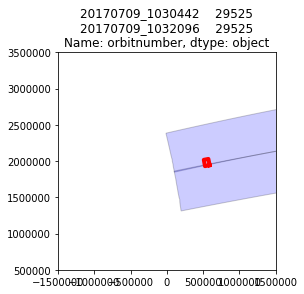

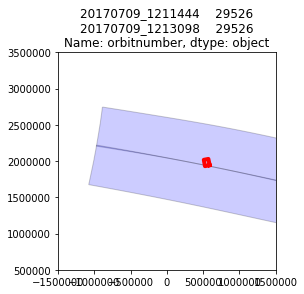

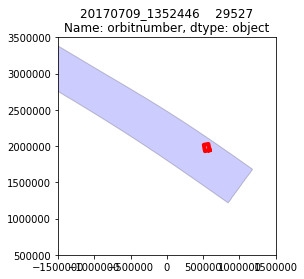

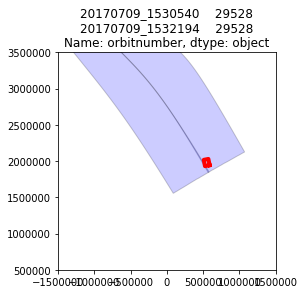

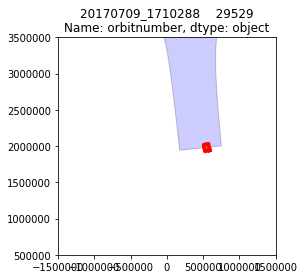

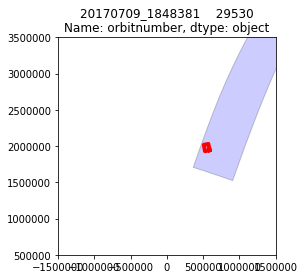

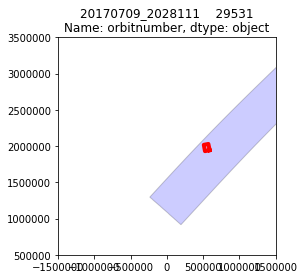

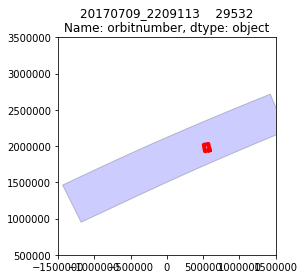

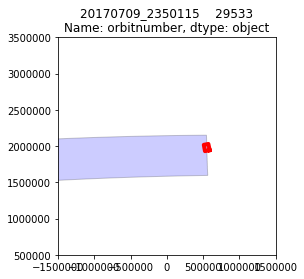

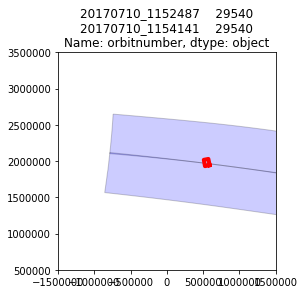

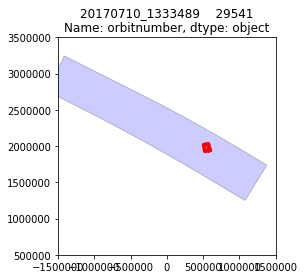

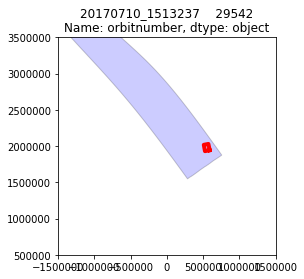

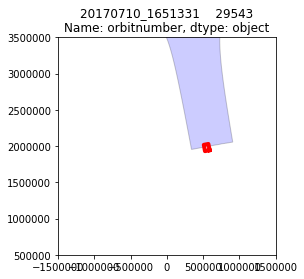

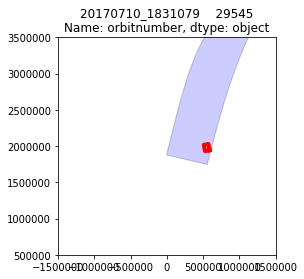

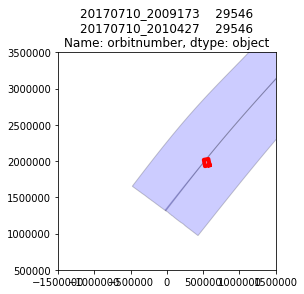

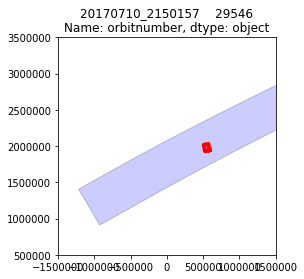

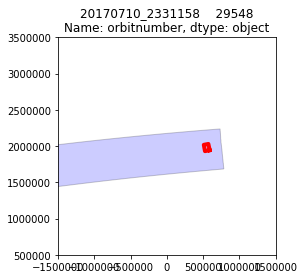

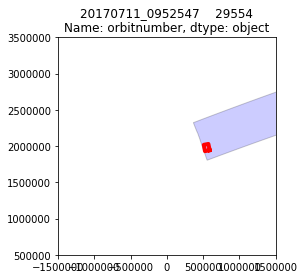

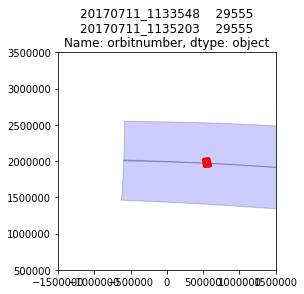

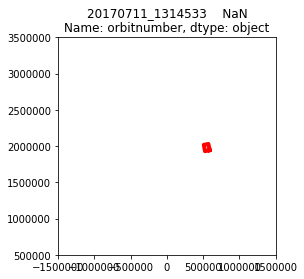

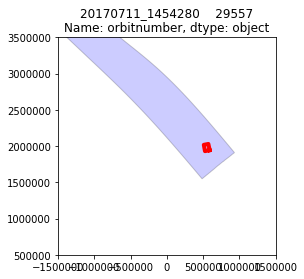

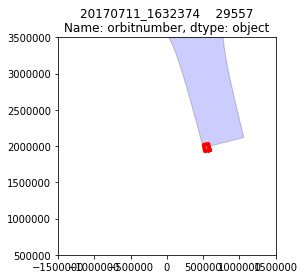

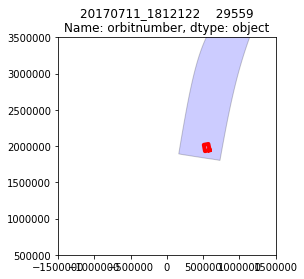

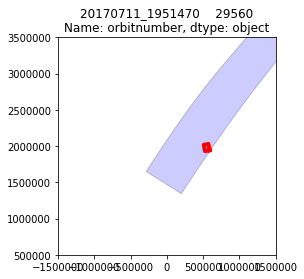

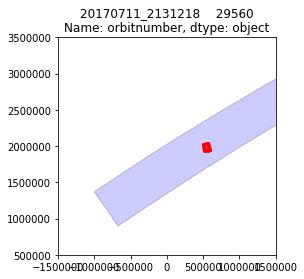

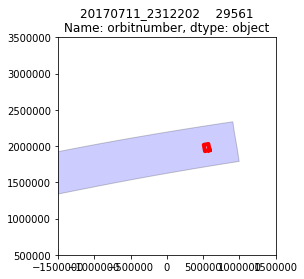

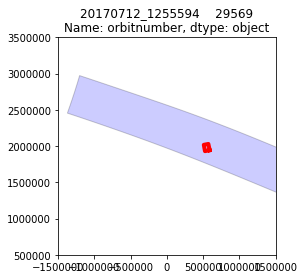

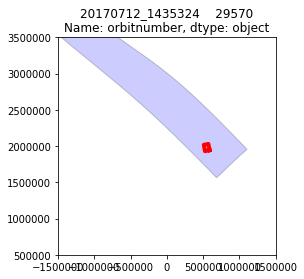

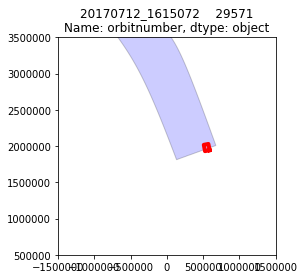

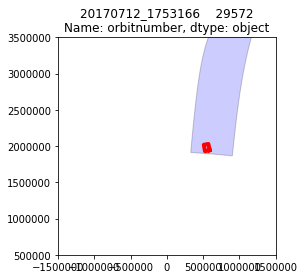

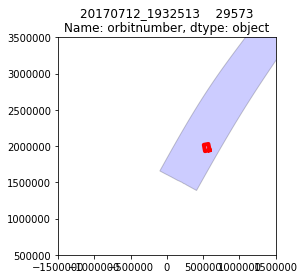

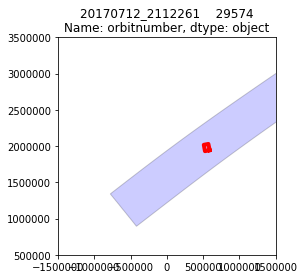

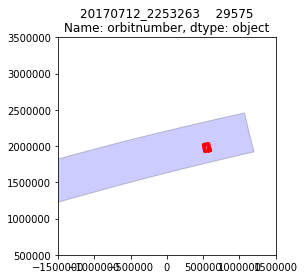

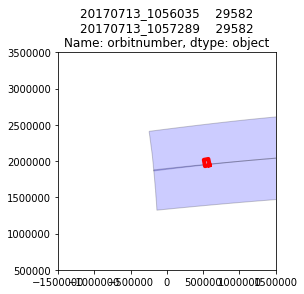

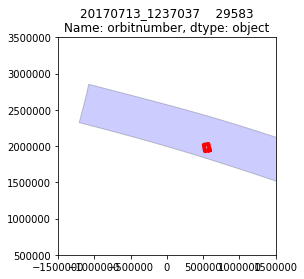

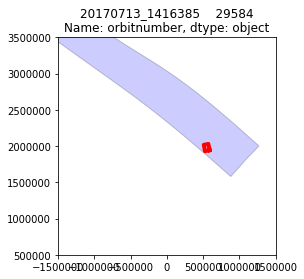

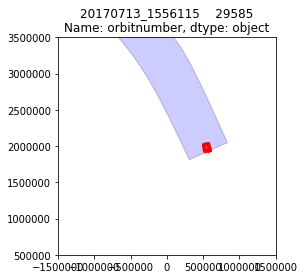

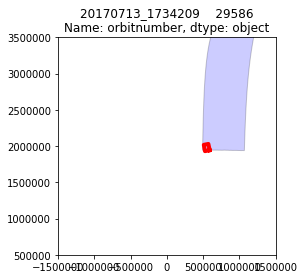

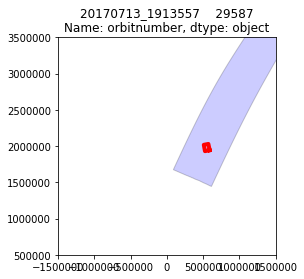

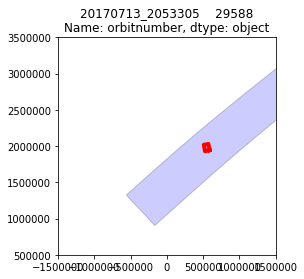

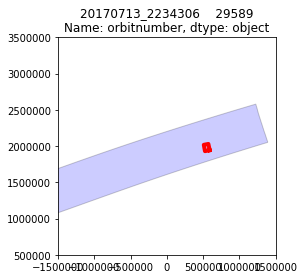

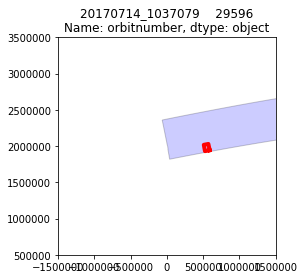

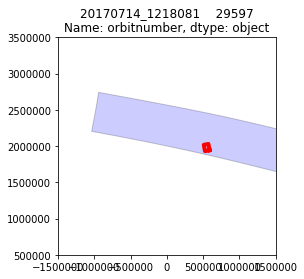

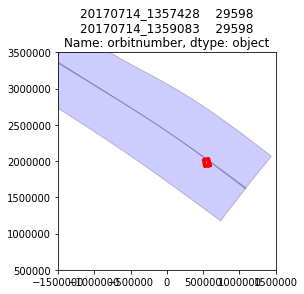

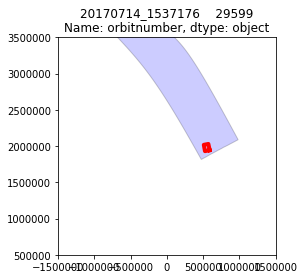

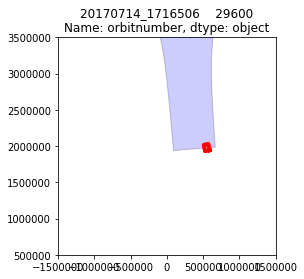

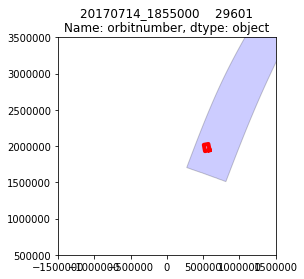

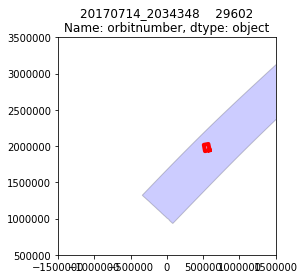

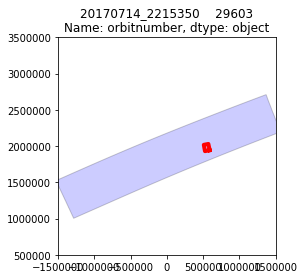

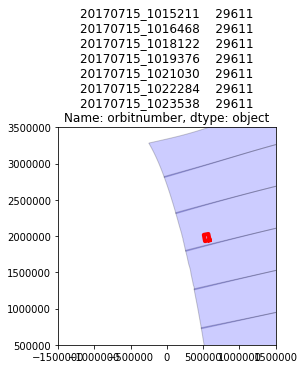

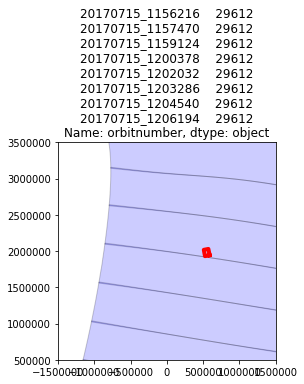

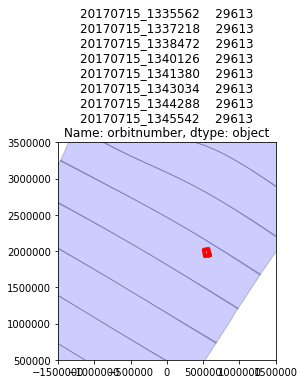

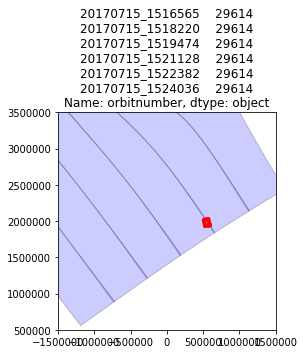

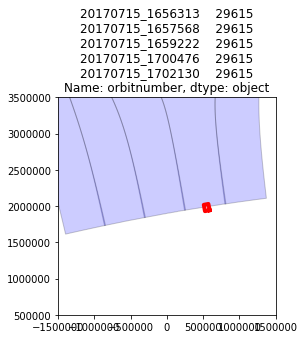

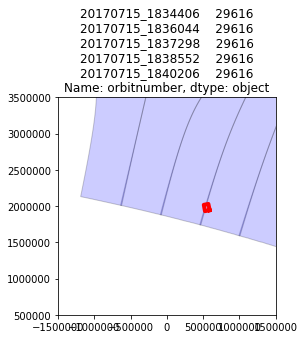

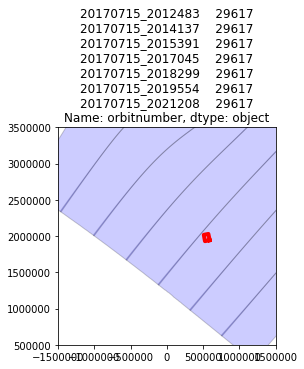

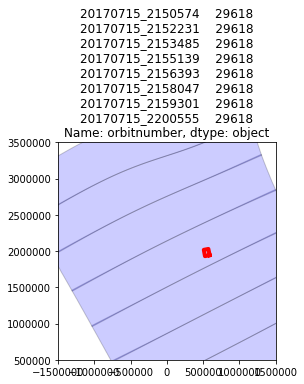

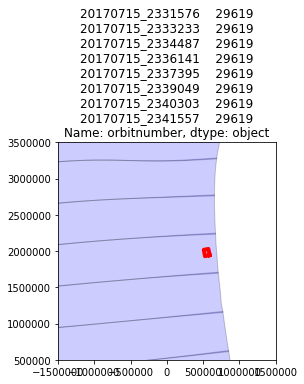

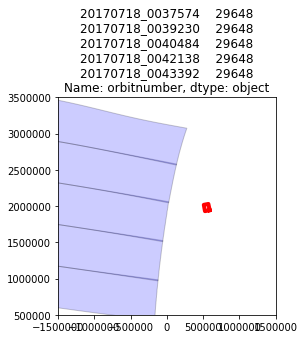

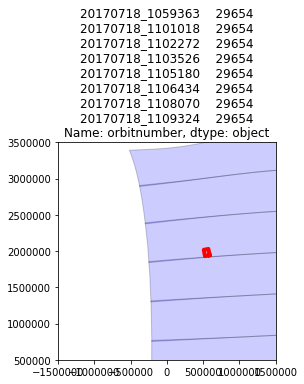

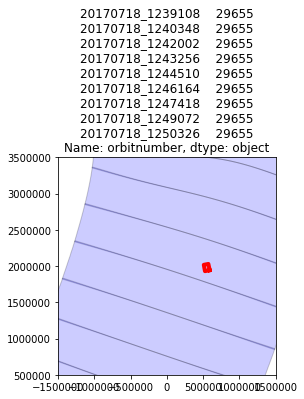

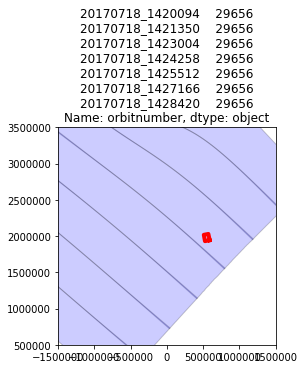

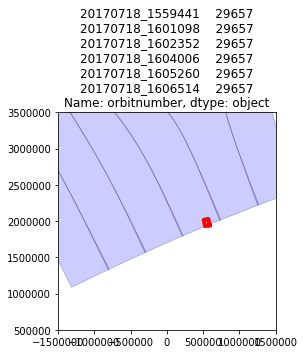

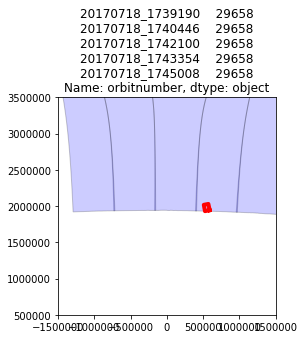

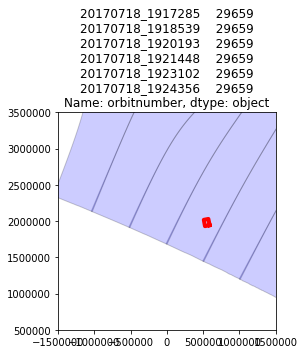

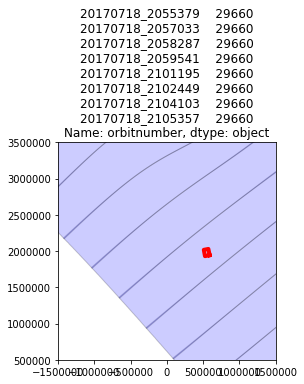

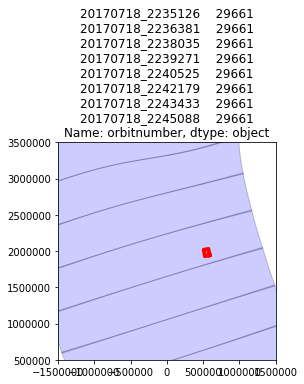

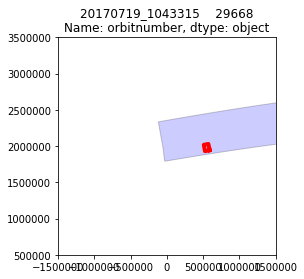

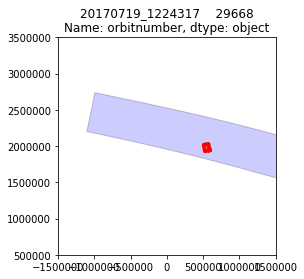

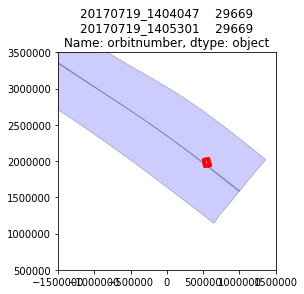

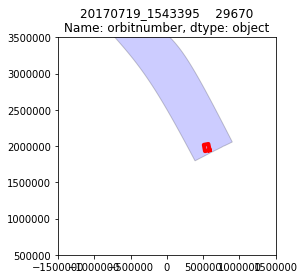

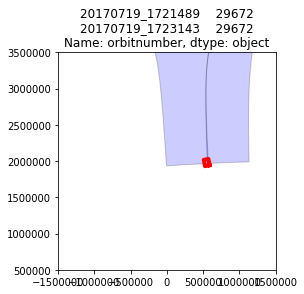

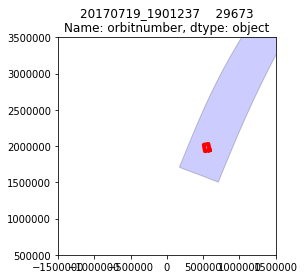

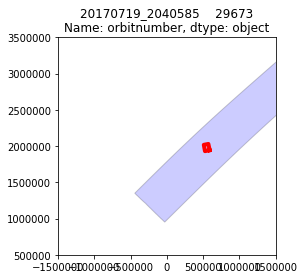

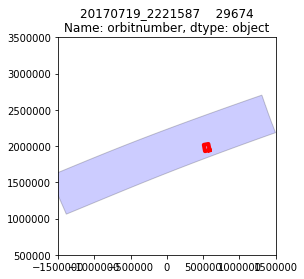

In [14]:
for name, group in grouped:
    print(name)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlim((-1500000, 1500000))
    ax.set_ylim((500000, 3500000))
    ax.set_aspect('equal')
    ax.set_title(group['orbitnumber'])
    ax.plot(*(np.array(studyarea_AAlb.boundary).T), color='red', linewidth=4)
    for idx, row in group.iterrows():
        try:
            poly = wkt.loads((row[u'edgepolygon_I']))
        except (KeyError, TypeError):
            print("no edgepolygon")
            continue
        ax.add_patch(descartes.PolygonPatch(transform(project, poly), fc='blue', alpha=0.2))
    plt.show

In [15]:
for name, group in grouped:
    print(name)
    for idx, row in group.iterrows():
        try:
            poly = wkt.loads((row[u'edgepolygon_I']))
        except (KeyError, TypeError) as e:
            print("{}: no edgepolygon. {}".format(idx, e))
            continue
        if transform(project, poly).intersects(studyarea_AAlb):
            print(idx, 'Intersects')
        else:
            catalogdf.loc[idx, 'file_present'] = False
            print(idx, "Doesn't intersect")

/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1028
20170709_1030442 Intersects
20170709_1032096 Intersects
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1208
20170709_1211444 Intersects
20170709_1213098 Intersects
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1348
20170709_1352446 Intersects
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1529
20170709_1530540 Intersects
20170709_1532194 Intersects
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1708
20170709_1710288 Intersects
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_1846
20170709_1848381 Intersects
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_190_2024
20170709_2028111 Intersects
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_09_1

20170718_1109324 Doesn't intersect
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1239
20170718_1239108 Doesn't intersect
20170718_1240348 Doesn't intersect
20170718_1242002 Doesn't intersect
20170718_1243256 Intersects
20170718_1244510 Doesn't intersect
20170718_1246164 Doesn't intersect
20170718_1247418 Doesn't intersect
20170718_1249072 Doesn't intersect
20170718_1250326 Doesn't intersect
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1420
20170718_1420094 Doesn't intersect
20170718_1421350 Doesn't intersect
20170718_1423004 Intersects
20170718_1424258 Doesn't intersect
20170718_1425512 Doesn't intersect
20170718_1427166 Doesn't intersect
20170718_1428420 Doesn't intersect
/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1600
20170718_1559441 Doesn't intersect
20170718_1601098 Doesn't intersect
20170718_1602352 Intersects
20170718_1604006 Doesn't intersect
20170718_1605

In [16]:
catalogdf

,GITCO,edgepolygon_I,GMTCO,orbitnumber,ascending_node,SVM16,SVM14,SVM15,SVM12,SVM13,...,SVM06,SVM01,SVM03,SVM02,granuleID,SVM09,SVM08,SVDNB,dir,file_present
20170709_1030442,GITCO_npp_d20170709_t1030442_e1032084_b29525_c...,POLYGON ((-154.3753967285156 71.46446228027344...,GMTCO_npp_d20170709_t1030442_e1032084_b29525_c...,29525,False,SVM16_npp_d20170709_t1030442_e1032084_b29525_c...,SVM14_npp_d20170709_t1030442_e1032084_b29525_c...,SVM15_npp_d20170709_t1030442_e1032084_b29525_c...,SVM12_npp_d20170709_t1030442_e1032084_b29525_c...,SVM13_npp_d20170709_t1030442_e1032084_b29525_c...,...,SVM06_npp_d20170709_t1030442_e1032084_b29525_c...,SVM01_npp_d20170709_t1030442_e1032084_b29525_c...,SVM03_npp_d20170709_t1030442_e1032084_b29525_c...,SVM02_npp_d20170709_t1030442_e1032084_b29525_c...,NPP001802682471,SVM09_npp_d20170709_t1030442_e1032084_b29525_c...,SVM08_npp_d20170709_t1030442_e1032084_b29525_c...,SVDNB_npp_d20170709_t1030442_e1032084_b29525_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,True
20170709_1032096,GITCO_npp_d20170709_t1032096_e1033338_b29525_c...,POLYGON ((-151.7405548095703 66.69197845458984...,GMTCO_npp_d20170709_t1032096_e1033338_b29525_c...,29525,False,SVM16_npp_d20170709_t1032096_e1033338_b29525_c...,SVM14_npp_d20170709_t1032096_e1033338_b29525_c...,SVM15_npp_d20170709_t1032096_e1033338_b29525_c...,SVM12_npp_d20170709_t1032096_e1033338_b29525_c...,SVM13_npp_d20170709_t1032096_e1033338_b29525_c...,...,SVM06_npp_d20170709_t1032096_e1033338_b29525_c...,SVM01_npp_d20170709_t1032096_e1033338_b29525_c...,SVM03_npp_d20170709_t1032096_e1033338_b29525_c...,SVM02_npp_d20170709_t1032096_e1033338_b29525_c...,NPP001802683324,SVM09_npp_d20170709_t1032096_e1033338_b29525_c...,SVM08_npp_d20170709_t1032096_e1033338_b29525_c...,SVDNB_npp_d20170709_t1032096_e1033338_b29525_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,True
20170709_1211444,GITCO_npp_d20170709_t1211444_e1213086_b29526_c...,"POLYGON ((178.9006652832031 73.10054016113281,...",GMTCO_npp_d20170709_t1211444_e1213086_b29526_c...,29526,False,SVM16_npp_d20170709_t1211444_e1213086_b29526_c...,SVM14_npp_d20170709_t1211444_e1213086_b29526_c...,SVM15_npp_d20170709_t1211444_e1213086_b29526_c...,SVM12_npp_d20170709_t1211444_e1213086_b29526_c...,SVM13_npp_d20170709_t1211444_e1213086_b29526_c...,...,SVM06_npp_d20170709_t1211444_e1213086_b29526_c...,SVM01_npp_d20170709_t1211444_e1213086_b29526_c...,SVM03_npp_d20170709_t1211444_e1213086_b29526_c...,SVM02_npp_d20170709_t1211444_e1213086_b29526_c...,NPP001802743069,SVM09_npp_d20170709_t1211444_e1213086_b29526_c...,SVM08_npp_d20170709_t1211444_e1213086_b29526_c...,SVDNB_npp_d20170709_t1211444_e1213086_b29526_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,True
20170709_1213098,GITCO_npp_d20170709_t1213098_e1214340_b29526_c...,POLYGON ((-177.8569030761719 68.35703277587891...,GMTCO_npp_d20170709_t1213098_e1214340_b29526_c...,29526,False,SVM16_npp_d20170709_t1213098_e1214340_b29526_c...,SVM14_npp_d20170709_t1213098_e1214340_b29526_c...,SVM15_npp_d20170709_t1213098_e1214340_b29526_c...,SVM12_npp_d20170709_t1213098_e1214340_b29526_c...,SVM13_npp_d20170709_t1213098_e1214340_b29526_c...,...,SVM06_npp_d20170709_t1213098_e1214340_b29526_c...,SVM01_npp_d20170709_t1213098_e1214340_b29526_c...,SVM03_npp_d20170709_t1213098_e1214340_b29526_c...,SVM02_npp_d20170709_t1213098_e1214340_b29526_c...,NPP001802743923,SVM09_npp_d20170709_t1213098_e1214340_b29526_c...,SVM08_npp_d20170709_t1213098_e1214340_b29526_c...,SVDNB_npp_d20170709_t1213098_e1214340_b29526_c...,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,True
20170709_1352446,GITCO_npp_d20170709_t1352446_e1354088_b29527_c...,"POLYGON ((151.8183441162109 74.71616363525391,...",GMTCO_npp_d20170709_t1352446_e1354088_b29527_c...,29527,False,SVM16_npp_d20170709_t1352446_e1354088_b29527_c...,SVM14_npp_d20170709_t1352446_e1354088_b29527_c...,SVM15_npp_d20170709_t1352446_e1354088_b29527_c...,SVM12_npp_d20170709_t1352446_e1354088_b29527_c...,SVM13_npp_d20170709_t1352446_e1354088_b29527

In [17]:
def removefiles(row, testing=False):
    print(row.name)
    if row['file_present']:
        print("Files in row should be kept")
    else:
        for fn in filecolumns:
            try:
                removepath = os.path.join(row['dir'], row[fn])
            except AttributeError:
                continue
            if not testing:
                try:
                    print("This is real, removing {}".format(removepath))
                    os.remove(removepath)
                except (IOError, OSError):
                    print("Tried to remove (), hit exception".format(removepath))
            else:
                print("This is just a test, not removing {}".format(removepath))
    return
def testremoval(row):
    print(row.name)
    if row['file_present']:
        print("Files in row should be kept")
    else:
        print("Files to be deleted")

In [18]:
removefiles_test = partial(removefiles, testing=True)
removefiles_forreal = partial(removefiles, testing=False)

In [19]:
catalogdf.apply(removefiles_test, axis=1)

20170709_1030442
Files in row should be kept
20170709_1032096
Files in row should be kept
20170709_1211444
Files in row should be kept
20170709_1213098
Files in row should be kept
20170709_1352446
Files in row should be kept
20170709_1530540
Files in row should be kept
20170709_1532194
Files in row should be kept
20170709_1710288
Files in row should be kept
20170709_1848381
Files in row should be kept
20170709_2028111
Files in row should be kept
20170709_2209113
Files in row should be kept
20170709_2350115
Files in row should be kept
20170710_1152487
Files in row should be kept
20170710_1154141
Files in row should be kept
20170710_1333489
Files in row should be kept
20170710_1513237
Files in row should be kept
20170710_1651331
Files in row should be kept
20170710_1831079
Files in row should be kept
20170710_2009173
Files in row should be kept
20170710_2010427
Files in row should be kept
20170710_2150157
Files in row should be kept
20170710_2331158
Files in row should be kept
20170711_0

This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1155/SVM08_npp_d20170715_t1203286_e1204528_b29612_c20170715121541320080_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1155/SVDNB_npp_d20170715_t1203286_e1204528_b29612_c20170715121539207066_cspp_dev.h5
20170715_1204540
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1155/GITCO_npp_d20170715_t1204540_e1206182_b29612_c20170715121536675966_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1155/GMTCO_npp_d20170715_t1204540_e1206182_b29612_c20170715121537277378_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1155/SVM16_npp_d20170715_t1204540_e1206182_b296

This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1059/SVI02_npp_d20170718_t1103526_e1105168_b29654_c20170718111858048507_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1059/SVI05_npp_d20170718_t1103526_e1105168_b29654_c20170718111859674481_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1059/SVI04_npp_d20170718_t1103526_e1105168_b29654_c20170718111858845477_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1059/GDNBO_npp_d20170718_t1103526_e1105168_b29654_c20170718111847030911_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1059/SVM05_npp_d20170718_t1103526_e1105168_b29654_c2017071811190

This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2235/SVM03_npp_d20170718_t2245088_e2246330_b29661_c20170718225528805473_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2235/SVM02_npp_d20170718_t2245088_e2246330_b29661_c20170718225528782888_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2235/SVM09_npp_d20170718_t2245088_e2246330_b29661_c20170718225529011012_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2235/SVM08_npp_d20170718_t2245088_e2246330_b29661_c20170718225528988672_cspp_dev.h5
This is just a test, not removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2235/SVDNB_npp_d20170718_t2245088_e2246330_b29661_c2017071822552

20170709_1030442    None
20170709_1032096    None
20170709_1211444    None
20170709_1213098    None
20170709_1352446    None
20170709_1530540    None
20170709_1532194    None
20170709_1710288    None
20170709_1848381    None
20170709_2028111    None
20170709_2209113    None
20170709_2350115    None
20170710_1152487    None
20170710_1154141    None
20170710_1333489    None
20170710_1513237    None
20170710_1651331    None
20170710_1831079    None
20170710_2009173    None
20170710_2010427    None
20170710_2150157    None
20170710_2331158    None
20170711_0952547    None
20170711_1133548    None
20170711_1135203    None
20170711_1314533    None
20170711_1454280    None
20170711_1632374    None
20170711_1812122    None
20170711_1951470    None
                    ... 
20170718_1920193    None
20170718_1921448    None
20170718_1923102    None
20170718_1924356    None
20170718_2055379    None
20170718_2057033    None
20170718_2058287    None
20170718_2059541    None
20170718_2101195    None


In [20]:
catalogdf.apply(removefiles_forreal, axis=1)

20170709_1030442
Files in row should be kept
20170709_1032096
Files in row should be kept
20170709_1211444
Files in row should be kept
20170709_1213098
Files in row should be kept
20170709_1352446
Files in row should be kept
20170709_1530540
Files in row should be kept
20170709_1532194
Files in row should be kept
20170709_1710288
Files in row should be kept
20170709_1848381
Files in row should be kept
20170709_2028111
Files in row should be kept
20170709_2209113
Files in row should be kept
20170709_2350115
Files in row should be kept
20170710_1152487
Files in row should be kept
20170710_1154141
Files in row should be kept
20170710_1333489
Files in row should be kept
20170710_1513237
Files in row should be kept
20170710_1651331
Files in row should be kept
20170710_1831079
Files in row should be kept
20170710_2009173
Files in row should be kept
20170710_2010427
Files in row should be kept
20170710_2150157
Files in row should be kept
20170710_2331158
Files in row should be kept
20170711_0

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1016/SVI05_npp_d20170715_t1021030_e1022272_b29611_c20170715103155433258_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1016/SVI04_npp_d20170715_t1021030_e1022272_b29611_c20170715103154932233_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1016/GDNBO_npp_d20170715_t1021030_e1022272_b29611_c20170715103145317898_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1016/SVM05_npp_d20170715_t1021030_e1022272_b29611_c20170715103156834195_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1016/SVM04_npp_d20170715_t1021030_e1022272_b29611_c20170715103156615941_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1336/SVM14_npp_d20170715_t1335562_e1337206_b29613_c20170715135552545310_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1336/SVM15_npp_d20170715_t1335562_e1337206_b29613_c20170715135552678478_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1336/SVM12_npp_d20170715_t1335562_e1337206_b29613_c20170715135551976021_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1336/SVM13_npp_d20170715_t1335562_e1337206_b29613_c20170715135552012977_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1336/SVM10_npp_d20170715_t1335562_e1337206_b29613_c20170715135551358836_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1516/SVM01_npp_d20170715_t1524036_e1525279_b29614_c20170715153252665450_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1516/SVM03_npp_d20170715_t1524036_e1525279_b29614_c20170715153252905930_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1516/SVM02_npp_d20170715_t1524036_e1525279_b29614_c20170715153252787542_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1516/SVM09_npp_d20170715_t1524036_e1525279_b29614_c20170715153253491704_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1516/SVM08_npp_d20170715_t1524036_e1525279_b29614_c20170715153253468034_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1834/SVI05_npp_d20170715_t1838552_e1840193_b29616_c20170715184743497197_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1834/SVI04_npp_d20170715_t1838552_e1840193_b29616_c20170715184743378834_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1834/GDNBO_npp_d20170715_t1838552_e1840193_b29616_c20170715184741125500_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1834/SVM05_npp_d20170715_t1838552_e1840193_b29616_c20170715184743672413_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_1834/SVM04_npp_d20170715_t1838552_e1840193_b29616_c20170715184743643416_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2012/SVM05_npp_d20170715_t2019554_e2021195_b29617_c20170715203110824054_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2012/SVM04_npp_d20170715_t2019554_e2021195_b29617_c20170715203110788257_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2012/SVM07_npp_d20170715_t2019554_e2021195_b29617_c20170715203111548300_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2012/SVM06_npp_d20170715_t2019554_e2021195_b29617_c20170715203110859685_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2012/SVM01_npp_d20170715_t2019554_e2021195_b29617_c20170715203110700343_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2151/SVI04_npp_d20170715_t2152231_e2153473_b29618_c20170715221231304640_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2151/GDNBO_npp_d20170715_t2152231_e2153473_b29618_c20170715221216101475_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2151/SVM05_npp_d20170715_t2152231_e2153473_b29618_c20170715221233340077_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2151/SVM04_npp_d20170715_t2152231_e2153473_b29618_c20170715221232944150_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2151/SVM07_npp_d20170715_t2152231_e2153473_b29618_c20170715221235818786_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2332/SVM05_npp_d20170715_t2331576_e2333221_b29619_c20170715235045312949_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2332/SVM04_npp_d20170715_t2331576_e2333221_b29619_c20170715235045250959_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2332/SVM07_npp_d20170715_t2331576_e2333221_b29619_c20170715235045970832_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2332/SVM06_npp_d20170715_t2331576_e2333221_b29619_c20170715235045348833_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_15_196_2332/SVM01_npp_d20170715_t2331576_e2333221_b29619_c20170715235045179832_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_0038/SVM09_npp_d20170718_t0040484_e0042126_b29648_c20170718005039954277_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_0038/SVM08_npp_d20170718_t0040484_e0042126_b29648_c20170718005039901635_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_0038/SVDNB_npp_d20170718_t0040484_e0042126_b29648_c20170718005031851000_cspp_dev.h5
20170718_0042138
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_0038/GITCO_npp_d20170718_t0042138_e0043380_b29648_c20170718005035291778_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_0038/GMTCO_npp_d20170718_t0042138_e0043380_b29648_c20170718005036899018_cspp_dev.h5
This is real, remo

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1239/SVM01_npp_d20170718_t1242002_e1243244_b29655_c20170718130031480026_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1239/SVM03_npp_d20170718_t1242002_e1243244_b29655_c20170718130031701761_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1239/SVM02_npp_d20170718_t1242002_e1243244_b29655_c20170718130031596495_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1239/SVM09_npp_d20170718_t1242002_e1243244_b29655_c20170718130032355495_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1239/SVM08_npp_d20170718_t1242002_e1243244_b29655_c20170718130032170856_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1600/SVM11_npp_d20170718_t1559441_e1601085_b29657_c20170718161448311654_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1600/SVI01_npp_d20170718_t1559441_e1601085_b29657_c20170718161442750369_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1600/SVI03_npp_d20170718_t1559441_e1601085_b29657_c20170718161443733050_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1600/SVI02_npp_d20170718_t1559441_e1601085_b29657_c20170718161443526450_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1600/SVI05_npp_d20170718_t1559441_e1601085_b29657_c20170718161445696182_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1739/GMTCO_npp_d20170718_t1743354_e1744595_b29658_c20170718175132202833_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1739/SVM16_npp_d20170718_t1743354_e1744595_b29658_c20170718175133363315_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1739/SVM14_npp_d20170718_t1743354_e1744595_b29658_c20170718175133313664_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1739/SVM15_npp_d20170718_t1743354_e1744595_b29658_c20170718175133339087_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1739/SVM12_npp_d20170718_t1743354_e1744595_b29658_c20170718175133246150_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1916/SVI04_npp_d20170718_t1917285_e1918527_b29659_c20170718193344836534_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1916/GDNBO_npp_d20170718_t1917285_e1918527_b29659_c20170718193334347786_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1916/SVM05_npp_d20170718_t1917285_e1918527_b29659_c20170718193346171107_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1916/SVM04_npp_d20170718_t1917285_e1918527_b29659_c20170718193345786722_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_1916/SVM07_npp_d20170718_t1917285_e1918527_b29659_c20170718193347486590_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2055/SVM16_npp_d20170718_t2055379_e2057021_b29660_c20170718211556685158_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2055/SVM14_npp_d20170718_t2055379_e2057021_b29660_c20170718211556336985_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2055/SVM15_npp_d20170718_t2055379_e2057021_b29660_c20170718211556492067_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2055/SVM12_npp_d20170718_t2055379_e2057021_b29660_c20170718211556209798_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2055/SVM13_npp_d20170718_t2055379_e2057021_b29660_c20170718211556266703_cspp_dev.h5
This is real, removing /Volumes/SCI

This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2235/GMTCO_npp_d20170718_t2235126_e2236369_b29661_c20170718225524498605_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2235/SVM16_npp_d20170718_t2235126_e2236369_b29661_c20170718225525581044_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2235/SVM14_npp_d20170718_t2235126_e2236369_b29661_c20170718225525537183_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2235/SVM15_npp_d20170718_t2235126_e2236369_b29661_c20170718225525559987_cspp_dev.h5
This is real, removing /Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJECT/2017VIIRSSubpix/VIIRS/2017_07_18_199_2235/SVM12_npp_d20170718_t2235126_e2236369_b29661_c20170718225525480287_cspp_dev.h5
This is real, removing /Volumes/SCI

20170709_1030442    None
20170709_1032096    None
20170709_1211444    None
20170709_1213098    None
20170709_1352446    None
20170709_1530540    None
20170709_1532194    None
20170709_1710288    None
20170709_1848381    None
20170709_2028111    None
20170709_2209113    None
20170709_2350115    None
20170710_1152487    None
20170710_1154141    None
20170710_1333489    None
20170710_1513237    None
20170710_1651331    None
20170710_1831079    None
20170710_2009173    None
20170710_2010427    None
20170710_2150157    None
20170710_2331158    None
20170711_0952547    None
20170711_1133548    None
20170711_1135203    None
20170711_1314533    None
20170711_1454280    None
20170711_1632374    None
20170711_1812122    None
20170711_1951470    None
                    ... 
20170718_1920193    None
20170718_1921448    None
20170718_1923102    None
20170718_1924356    None
20170718_2055379    None
20170718_2057033    None
20170718_2058287    None
20170718_2059541    None
20170718_2101195    None


In [27]:
catalogdf[catalogdf.file_present].to_json(
    os.path.join(
    config.viirsdir, 'finalcatalog.json'), 
    orient='index')

In [34]:
testin123 = pd.read_json(os.path.join(
    config.viirsdir, 'finalcatalog.json'), orient='index', transform)

In [35]:
testin123

,GDNBO,GITCO,GMTCO,SVDNB,SVI01,SVI02,SVI03,SVI04,SVI05,SVM01,...,SVM16,ascending_node,dir,dnb_complete,edgepolygon_I,file_present,granuleID,iband_complete,mband_complete,orbitnumber
20170709_1030442,GDNBO_npp_d20170709_t1030442_e1032084_b29525_c...,GITCO_npp_d20170709_t1030442_e1032084_b29525_c...,GMTCO_npp_d20170709_t1030442_e1032084_b29525_c...,SVDNB_npp_d20170709_t1030442_e1032084_b29525_c...,SVI01_npp_d20170709_t1030442_e1032084_b29525_c...,SVI02_npp_d20170709_t1030442_e1032084_b29525_c...,SVI03_npp_d20170709_t1030442_e1032084_b29525_c...,SVI04_npp_d20170709_t1030442_e1032084_b29525_c...,SVI05_npp_d20170709_t1030442_e1032084_b29525_c...,SVM01_npp_d20170709_t1030442_e1032084_b29525_c...,...,SVM16_npp_d20170709_t1030442_e1032084_b29525_c...,0.0,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,1,POLYGON ((-154.3753967285156 71.46446228027344...,1,NPP001802682471,1,1,29525.0
20170709_1032096,GDNBO_npp_d20170709_t1032096_e1033338_b29525_c...,GITCO_npp_d20170709_t1032096_e1033338_b29525_c...,GMTCO_npp_d20170709_t1032096_e1033338_b29525_c...,SVDNB_npp_d20170709_t1032096_e1033338_b29525_c...,SVI01_npp_d20170709_t1032096_e1033338_b29525_c...,SVI02_npp_d20170709_t1032096_e1033338_b29525_c...,SVI03_npp_d20170709_t1032096_e1033338_b29525_c...,SVI04_npp_d20170709_t1032096_e1033338_b29525_c...,SVI05_npp_d20170709_t1032096_e1033338_b29525_c...,SVM01_npp_d20170709_t1032096_e1033338_b29525_c...,...,SVM16_npp_d20170709_t1032096_e1033338_b29525_c...,0.0,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,1,POLYGON ((-151.7405548095703 66.69197845458984...,1,NPP001802683324,1,1,29525.0
20170709_1211444,GDNBO_npp_d20170709_t1211444_e1213086_b29526_c...,GITCO_npp_d20170709_t1211444_e1213086_b29526_c...,GMTCO_npp_d20170709_t1211444_e1213086_b29526_c...,SVDNB_npp_d20170709_t1211444_e1213086_b29526_c...,SVI01_npp_d20170709_t1211444_e1213086_b29526_c...,SVI02_npp_d20170709_t1211444_e1213086_b29526_c...,SVI03_npp_d20170709_t1211444_e1213086_b29526_c...,SVI04_npp_d20170709_t1211444_e1213086_b29526_c...,SVI05_npp_d20170709_t1211444_e1213086_b29526_c...,SVM01_npp_d20170709_t1211444_e1213086_b29526_c...,...,SVM16_npp_d20170709_t1211444_e1213086_b29526_c...,0.0,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,1,"POLYGON ((178.9006652832031 73.10054016113281,...",1,NPP001802743069,1,1,29526.0
20170709_1213098,GDNBO_npp_d20170709_t1213098_e1214340_b29526_c...,GITCO_npp_d20170709_t1213098_e1214340_b29526_c...,GMTCO_npp_d20170709_t1213098_e1214340_b29526_c...,SVDNB_npp_d20170709_t1213098_e1214340_b29526_c...,SVI01_npp_d20170709_t1213098_e1214340_b29526_c...,SVI02_npp_d20170709_t1213098_e1214340_b29526_c...,SVI03_npp_d20170709_t1213098_e1214340_b29526_c...,SVI04_npp_d20170709_t1213098_e1214340_b29526_c...,SVI05_npp_d20170709_t1213098_e1214340_b29526_c...,SVM01_npp_d20170709_t1213098_e1214340_b29526_c...,...,SVM16_npp_d20170709_t1213098_e1214340_b29526_c...,0.0,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,1,POLYGON ((-177.8569030761719 68.35703277587891...,1,NPP001802743923,1,1,29526.0
20170709_1352446,GDNBO_npp_d20170709_t1352446_e1354088_b29527_c...,GITCO_npp_d20170709_t1352446_e1354088_b29527_c...,GMTCO_npp_d20170709_t1352446_e1354088_b29527_c...,SVDNB_npp_d20170709_t1352446_e1354088_b29527_c...,SVI01_npp_d20170709_t1352446_e1354088_b29527_c...,SVI02_npp_d20170709_t1352446_e1354088_b29527_c...,SVI03_npp_d20170709_t1352446_e1354088_b29527_c...,SVI04_npp_d20170709_t1352446_e1354088_b29527_c...,SVI05_npp_d20170709_t1352446_e1354088_b29527_c...,SVM01_npp_d20170709_t1352446_e1354088_b29527_c...,...,SVM16_npp_d20170709_t1352446_e1354088_b29527_c...,0.0,/Volumes/SCIENCE_mobile_Mac/Fire/DATA_BY_PROJE...,1,"POLYGON ((151.8183441162109 74.71616363525391,...",1,NPP001802803668,1,1,29527.0
20170709_1530540,GDNBO_npp_d20170709_t1530540_e1532181_b29528_c...,GITCO_npp_d20170709_t1530540_e1532181_b29528_c...,GMTCO_npp_d20170709_t1530540_e1532181_b29528_c...,SVDNB_npp_d20170709_t1530540_e1532181_b29528_c...,SVI01_npp_d20170709_t1530540_e1532181_b29528_c...,SVI02_npp_d2